<a href="https://colab.research.google.com/github/Waranit-tec/Project-in-TU/blob/main/dsi206_cnn_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #FFF3E0; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">DSI206 Project</h1>
</div>


<div style="background-color: #FFE5E5; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">Yelp Restaurant Photo Classification</h1>
</div>


<div class="alert alert-block alert-info">
    <h2 align="left"> <font>Introduction</font></h2>

</div>

จุดมุ่งหมาย : เพื่อศึกษาวิธีการทำโมเดล Photo Clssification โดยการแยกประเภทของรูปภาพอาหาร ในร้านอาหารต่างๆ 9 ประเภท จากรูปภาพทั้งหมด 234842 ภาพ ในชุดข้อมูล Yelp Restaurant Photo Classification ด้วยภาษา Python


มีประเภทของอาหาร 9 อย่าง ดังนี้

1. good_for_lunch
2. good_for_dinner
3. takes_reservations
4. outdoor_seating
5. restaurant_is_expensive
6. has_alcohol
7. has_table_service
8. ambience_is_classy
9. good_for_kids

**File descriptions**
* sample_submission.csv
* test_photo_to_biz.csv
* test_photos
* train.csv
* train_photo_to_biz_ids.csv
* train_photos


### Members
1. 6524651095 ปาณิสรา กุยยะรัตน์
2. 6524651129 พิมพกานต์ คงทอง
3. 6524651236 ณัชชา คงแก้ว
4. 6524651301 พิชามญชุ์ พรอรุณสถาพร
5. 6524651343 รอยมีย์ เนสะและ
6. 6524651392 วรานิษฐ์ เตชะระพีพัฒน์

### ขั้นตอนการดำเนินงาน
1. Data Exploration
2. Data Preparation
3. Modeling
4. Project Summary

# 1.Data Exploration
*  Imports Libraries ที่ต้องการใช้
* นำเข้าข้อมูลจากชุดข้อมูล
* ดูข้อมูลที่นำเข้ามาว่ามีข้อมูลอะไรบ้าง

In [ ]:
# import Library ทั้งหมดที่ต้องใช้
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from skimage import io
import os
from tqdm import tqdm
from PIL import Image
import random
import IPython.display as display_module
from IPython.display import display
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


นำเข้าชุดข้อมูล Yelp Restaurant Photo Classification

In [ ]:
%%bash
tar -xzf /kaggle/input/yelp-restaurant-photo-classification/sample_submission.csv.tgz
tar -xzf /kaggle/input/yelp-restaurant-photo-classification/test_photo_to_biz.csv.tgz
tar -xzf /kaggle/input/yelp-restaurant-photo-classification/test_photos.tgz
tar -xzf /kaggle/input/yelp-restaurant-photo-classification/train.csv.tgz
tar -xzf /kaggle/input/yelp-restaurant-photo-classification/train_photo_to_biz_ids.csv.tgz
tar -xzf /kaggle/input/yelp-restaurant-photo-classification/train_photos.tgz

อ่านไฟล์ csv แล้วนำข้อมูลไปเก็บในตัวแปรต่างๆ

In [ ]:
# อ่านไฟล์ csv แล้วนำข้อมูลไปเก็บในตัวแปรต่างๆ
train_data = pd.read_csv('train.csv')
train_photo_to_biz_ids = pd.read_csv('train_photo_to_biz_ids.csv')
test_photo_to_biz = pd.read_csv('test_photo_to_biz.csv')
sample_sub = pd.read_csv('sample_submission.csv')

# แสดง information และตัวอย่างข้อมูล ของข้อมูล Train data
print(train_data.info())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  2000 non-null   int64 
 1   labels       1996 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None
   business_id         labels
0         1000  1 2 3 4 5 6 7
1         1001        0 1 6 8
2          100    1 2 4 5 6 7
3         1006      1 2 4 5 6
4         1010          0 6 8


## Dataframe แสดงตัวอย่างข้อมูลที่นำเข้ามา

แสดงตัวอย่างข้อมูล และจำนวนข้อมูลใน train_photo_to_biz_ids

In [ ]:
display_module.display(train_photo_to_biz_ids.head())
print('Shape of train_photo_to_id:', train_photo_to_biz_ids.shape)
print('Number of images in training set:', train_photo_to_biz_ids.shape[0])

photo_id  business_id
0    204149         3034
1     52779         2805
2    278973          485
3    195284          485
4     19992          485

Shape of train_photo_to_id: (234842, 2)
Number of images in training set: 234842


แสดงตัวอย่างข้อมูล และจำนวนข้อมูลใน train_data

In [ ]:
display_module.display(train_data.head())
print('Shape of train data:', train_data.shape)
print('Number of unique businesses:', train_data.shape[0])

business_id         labels
0         1000  1 2 3 4 5 6 7
1         1001        0 1 6 8
2          100    1 2 4 5 6 7
3         1006      1 2 4 5 6
4         1010          0 6 8

Shape of train data: (2000, 2)
Number of unique businesses: 2000


**Missing Values**
ตรวจสอบข้อมูลที่หายไปในชุดข้อมูล และแสดงรายละเอียดข้อมูลนั้น เนื่องจาก Missing Values สามารถมีผลกระทบต่อการ Train Model เราจึงทำการลบ Missing Values ออกจากชุดข้อมูล

In [ ]:
# Business id to labels dataframe
print('Total number of missing labels:', train_data['labels'].isnull().sum())
display_module.display(train_data[train_data['labels'].isnull()])

Total number of missing labels: 4


business_id labels
385          1627    NaN
928          2661    NaN
1083         2941    NaN
1678          430    NaN

In [ ]:
# ลบค่าที่หายไปจากคอลัมน์ 'labels'
train_data = train_data.dropna(subset=['labels'])

# ตรวจสอบข้อมูลหลังจากลบค่าที่หายไป
print('Total number of missing labels after removal:', train_data['labels'].isnull().sum())

Total number of missing labels after removal: 0


In [ ]:
image_files = [f for f in os.listdir('/kaggle/working/train_photos') if f.endswith(('.jpg', '.jpeg', '.png')) and not f.startswith(('._'))]

### Merg Dataframe
นำข้อมูลที่มีความเกี่ยวข้องกัน ของแต่ละ dataframe มาเชื่อมโยงกัน เพื่อสามารถเรียกใช้ข้อมูลได้อย่างมีประสิทธิภาพ

In [ ]:
data=pd.merge(train_photo_to_biz_ids, train_data, on='business_id',how='left')
data=data.head(20000)
data

photo_id  business_id         labels
0        204149         3034            3 8
1         52779         2805    1 2 3 5 6 7
2        278973          485  1 2 3 4 5 6 7
3        195284          485  1 2 3 4 5 6 7
4         19992          485  1 2 3 4 5 6 7
...         ...          ...            ...
19995    347251          701  1 2 3 4 5 6 7
19996    175975         3738            3 8
19997    410799         3699  1 2 3 4 5 6 7
19998    182976         3699  1 2 3 4 5 6 7
19999    190590         3699  1 2 3 4 5 6 7

[20000 rows x 3 columns]

In [ ]:
data=data.dropna(subset=['labels'])
data = data.head(10000)
data

photo_id  business_id         labels
0        204149         3034            3 8
1         52779         2805    1 2 3 5 6 7
2        278973          485  1 2 3 4 5 6 7
3        195284          485  1 2 3 4 5 6 7
4         19992          485  1 2 3 4 5 6 7
...         ...          ...            ...
10005    403950         3157          0 3 8
10006    309181         3157          0 3 8
10007    106768         3157          0 3 8
10008    277326         3157          0 3 8
10009     48917         3157          0 3 8

[10000 rows x 3 columns]

In [ ]:
data_test=pd.merge(test_photo_to_biz ,sample_sub,on='business_id',how='left')
data_test.head()

photo_id business_id labels
0    317818       003sg  1 2 3
1     30679       003sg  1 2 3
2    455084       003sg  1 2 3
3    371381       003sg  1 2 3
4     86224       003sg  1 2 3

In [ ]:
data['labs']=data['labels'].apply(lambda x:str(x).split(' '))
data

photo_id  business_id         labels                   labs
0        204149         3034            3 8                 [3, 8]
1         52779         2805    1 2 3 5 6 7     [1, 2, 3, 5, 6, 7]
2        278973          485  1 2 3 4 5 6 7  [1, 2, 3, 4, 5, 6, 7]
3        195284          485  1 2 3 4 5 6 7  [1, 2, 3, 4, 5, 6, 7]
4         19992          485  1 2 3 4 5 6 7  [1, 2, 3, 4, 5, 6, 7]
...         ...          ...            ...                    ...
10005    403950         3157          0 3 8              [0, 3, 8]
10006    309181         3157          0 3 8              [0, 3, 8]
10007    106768         3157          0 3 8              [0, 3, 8]
10008    277326         3157          0 3 8              [0, 3, 8]
10009     48917         3157          0 3 8              [0, 3, 8]

[10000 rows x 4 columns]

In [ ]:
#แปลงค่า คอลัมน์ 'labs' จากประเภท string เป็น int
labelsint=data.labs.tolist()
for i in tqdm(labelsint):
    for j in range(len(i)):
        i[j]=int(i[j])

100%|██████████| 10000/10000 [00:00<00:00, 380215.02it/s]


In [ ]:
data['labsint']=labelsint
data

data_train=data[["photo_id","labsint"]]
data_train

photo_id                labsint
0        204149                 [3, 8]
1         52779     [1, 2, 3, 5, 6, 7]
2        278973  [1, 2, 3, 4, 5, 6, 7]
3        195284  [1, 2, 3, 4, 5, 6, 7]
4         19992  [1, 2, 3, 4, 5, 6, 7]
...         ...                    ...
10005    403950              [0, 3, 8]
10006    309181              [0, 3, 8]
10007    106768              [0, 3, 8]
10008    277326              [0, 3, 8]
10009     48917              [0, 3, 8]

[10000 rows x 2 columns]

แสดงรูปตัวอย่างใน train_photos

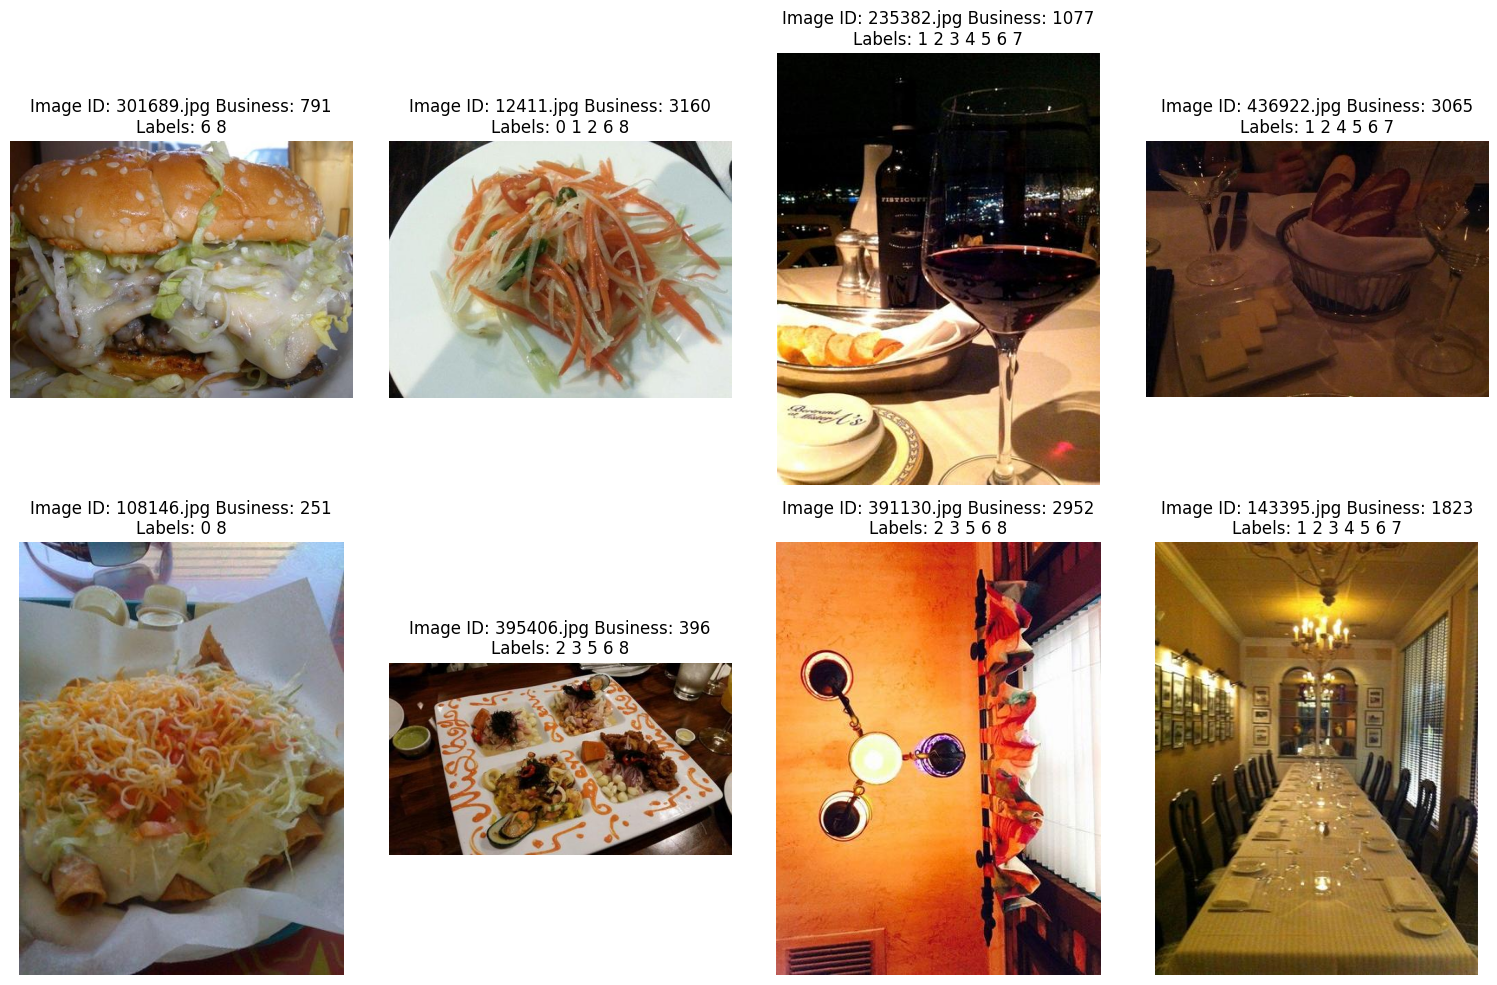

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# หาไฟล์ภาพที่ใช้ได้
image_files = [f for f in os.listdir('/kaggle/working/train_photos') if f.endswith(('.jpg', '.jpeg', '.png')) and not f.startswith(('._'))]

# Randomly sample 8 images
imgs_samples = random.sample(image_files, min(8, len(image_files)))

# Plot random sample of 8 images
plt.figure(figsize=(15, 10))

for i, img_file in enumerate(imgs_samples):
    # Get the image path
    img_path = os.path.join('/kaggle/working/train_photos', img_file)

    # Try to read the image
    img = cv2.imread(img_path)

    # Check if the image is successfully loaded
    if img is not None:
        # Convert color channels to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Grab image's business ID and labels (assuming you have these variables defined)
        business = train_photo_to_biz_ids.loc[train_photo_to_biz_ids['photo_id'] == int(img_file[:-4]), 'business_id']
        labels = train_data.loc[train_data['business_id'] == business.values[0], 'labels']

        # Annotate each image with image ID, business ID, and labels
        title = "Image ID: " + img_file + ' Business: ' + str(business.values[0]) + '\nLabels: ' + ''.join(labels.values)

         # Plot the image
        plt.subplot(2, 4, i+1)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    else:
        print(f"Error: Unable to read image: {img_path}")

plt.show()

# 2.Data Preparation

จัดเตรียมข้อมูลเพื่อนำมา train โดยโหลดรูปภาพจากไฟล์ในโฟลเดอร์ 'train_photos' และนำมาเก็บไว้ในตัวแปร X  และทำการแปลงรูปภาพให้อยู่ในรูปแบบของ NumPy array เพื่อให้สามารถนำมาใช้ในการฝึกโมเดลได้

In [ ]:
# resize ให้มีขนาด รูปภาพให้ขนาดเท่ากัน
img_width = 200
img_height = 200
num_images = 10000

X = []

for i in tqdm(range(num_images)):
    photo_id = data['photo_id'].iloc[i]
    path = 'train_photos/' + str(photo_id) + '.jpg'

    img = image.load_img(path, target_size = (img_width, img_height))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 10000/10000 [00:19<00:00, 522.44it/s]


### One-Hot Encoding
ใช้  One-Hot Encoding เพื่อแปลงข้อมูลประเภทของรูปภาพอาหาร ที่มีอยู่ในประเภทอาหารนั้นๆ ให้กลายเป็น vector มีค่า 1,0 เพื่อให้โมเดล Machine Learning ทำงานง่ายขึ้น

In [ ]:
# ลบคอลัมน์ที่ไม่ต้องการ
y = data.drop(['photo_id', 'labels', 'business_id', 'labs'], axis=1)
# ข้อมูล
# Define label names
label_names = ['good_for_lunch', 'good_for_dinner', 'takes_reservations',
               'outdoor_seating', 'restaurant_is_expensive', 'has_alcohol',
               'has_table_service', 'ambience_is_classy', 'good_for_kids']


# ใช้ MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_labels = mlb.fit_transform(y['labsint'])

y = pd.DataFrame(one_hot_labels, columns=label_names)
# สร้าง DataFrame ใหม่
y


good_for_lunch  good_for_dinner  takes_reservations  outdoor_seating  \
0                  0                0                   0                1   
1                  0                1                   1                1   
2                  0                1                   1                1   
3                  0                1                   1                1   
4                  0                1                   1                1   
...              ...              ...                 ...              ...   
9995               1                0                   0                1   
9996               1                0                   0                1   
9997               1                0                   0                1   
9998               1                0                   0                1   
9999               1                0                   0                1   

      restaurant_is_expensive  has_alcohol  has_table_service  \
0                           0            0                  0   
1                           0            1                  1   
2                           1            1                  1   
3                           1            1                  1   
4                           1            1                  1   
...                       ...          ...                ...   
9995                        0            0                  0   
9996                        0            0                  0   
9997                        0            0                  0   
9998                        0            0                  0   
9999                        0            0                  0   

      ambience_is_classy  good_for_kids  
0                      0              1  
1                      1              0  
2                      1              0  
3                      1              0  
4                      1              0  
...                  ...            ...  
9995                   0              1  
9996                   0              1  
9997                   0              1  
9998                   0              1  
9999                   0              1  

[10000 rows x 9 columns]

# 3.Modeling CNN Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

กำหนด เลเยอร์ต่างๆ ให้กับ โมเดล CNN ที่เราได้นำมาใช้

In [ ]:
model = Sequential()
model.add(Conv2D(32, (7,7), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(4,4))


model.add(Conv2D(64, (7,7), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(4,4))



model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())



model.add(Dense(9, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 194, 194, 32)      4736      
                                                                 
 batch_normalization (Batch  (None, 194, 194, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        100416    
                                                                 
 batch_normalization_1 (Bat  (None, 42, 42, 64)        256       
 chNormalization)                                                
                                                        

#### Train โมเดล

In [ ]:

# 1. สร้าง Adam optimizer โดยกำหนด learning_rate=0.01
opt = Adam(learning_rate=0.001)

# 2. Compile โมเดลโดยใช้ Adam optimizer ที่สร้างขึ้น
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# 3. Fit โมเดลด้วยข้อมูลการฝึกและการทดสอบ
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
250/250 [==============================] - 19s 37ms/step - loss: 5.8013 - accuracy: 0.1909 - val_loss: 6.5982 - val_accuracy: 0.1345
Epoch 2/20
250/250 [==============================] - 7s 27ms/step - loss: 5.5274 - accuracy: 0.1960 - val_loss: 4.6934 - val_accuracy: 0.2365
Epoch 3/20
250/250 [==============================] - 7s 27ms/step - loss: 5.3189 - accuracy: 0.1191 - val_loss: 6.0031 - val_accuracy: 0.0665
Epoch 4/20
250/250 [==============================] - 7s 26ms/step - loss: 5.3140 - accuracy: 0.0931 - val_loss: 5.5144 - val_accuracy: 0.0895
Epoch 5/20
250/250 [==============================] - 7s 27ms/step - loss: 5.1222 - accuracy: 0.1164 - val_loss: 5.0546 - val_accuracy: 0.1145
Epoch 6/20
250/250 [==============================] - 7s 27ms/step - loss: 4.9968 - accuracy: 0.0829 - val_loss: 6.1166 - val_accuracy: 0.0785
Epoch 7/20
250/250 [==============================] - 7s 26ms/step - loss: 5.0122 - accuracy: 0.0910 - val_loss: 4.9633 - val_accuracy: 0.189

In [ ]:
val_score, val_acc = model.evaluate(X_test, y_test, verbose=0)
train_score,train_acc = model.evaluate(X_train, y_train, verbose=0)
print('Validation score:', val_score,'Validation accuracy:', val_acc)
print('Train score:', train_score,'   Train accuracy:', train_acc)

Validation score: 3.6931138038635254 Validation accuracy: 0.05649999901652336
Train score: 3.6529529094696045    Train accuracy: 0.05624999850988388


กราฟแสดงค่า accuracy และ loss ของโมเดลในระหว่างการฝึก (training) และการทดสอบ (validation) ในแต่ละ epoch หลังจากการฝึกโมเดล

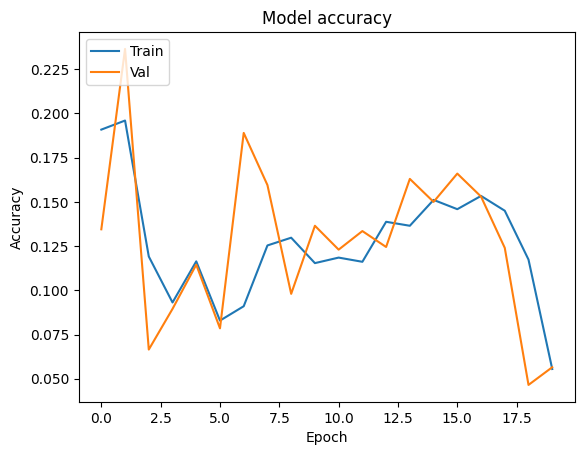

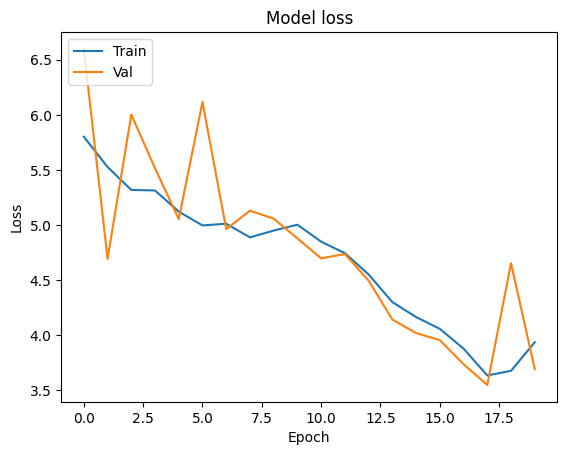

In [ ]:
def plot_learningCurve(history):
    # Plot training & validation accuracy values
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

# ใช้งานฟังก์ชัน
plot_learningCurve(history.history)


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

63/63 [==============================] - 1s 10ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names= label_names))

                         precision    recall  f1-score   support

         good_for_lunch       0.15      0.00      0.01       450
        good_for_dinner       0.55      0.05      0.09      1173
     takes_reservations       0.07      0.17      0.10       125
        outdoor_seating       0.11      0.12      0.12       144
restaurant_is_expensive       0.00      0.00      0.00         0
            has_alcohol       0.02      0.33      0.04        24
      has_table_service       0.03      0.12      0.05        59
     ambience_is_classy       0.00      0.00      0.00         0
          good_for_kids       0.00      0.00      0.00        25

               accuracy                           0.06      2000
              macro avg       0.10      0.09      0.04      2000
           weighted avg       0.37      0.06      0.07      2000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


สุ่มแสดงค่าที่ได้จากการใช้โมเดลทำนาย

1/1 [==============================] - 0s 57ms/step


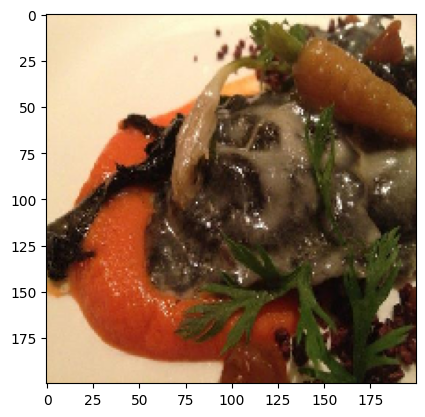

Predicted labels: ['takes_reservations', 'outdoor_seating', 'restaurant_is_expensive']
1/1 [==============================] - 0s 19ms/step


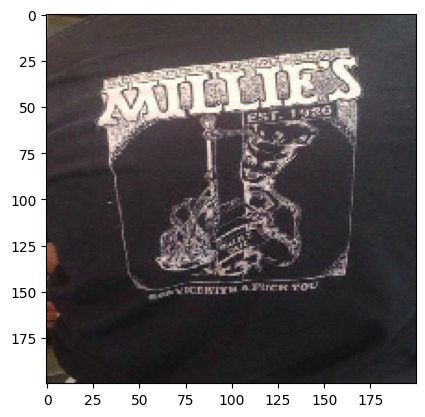

Predicted labels: ['takes_reservations', 'outdoor_seating', 'restaurant_is_expensive', 'has_table_service']
1/1 [==============================] - 0s 19ms/step


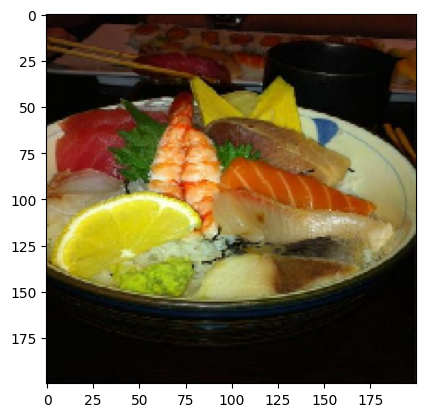

Predicted labels: ['outdoor_seating', 'has_alcohol', 'has_table_service', 'ambience_is_classy']
1/1 [==============================] - 0s 19ms/step


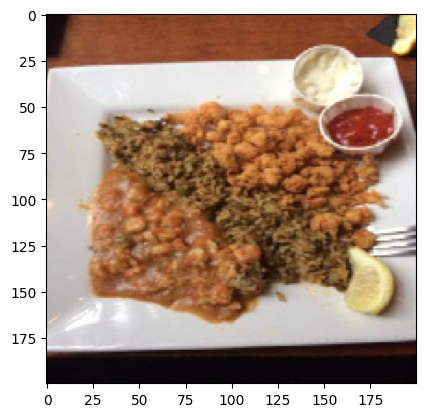

Predicted labels: ['takes_reservations', 'outdoor_seating', 'restaurant_is_expensive', 'has_alcohol', 'has_table_service']
1/1 [==============================] - 0s 20ms/step


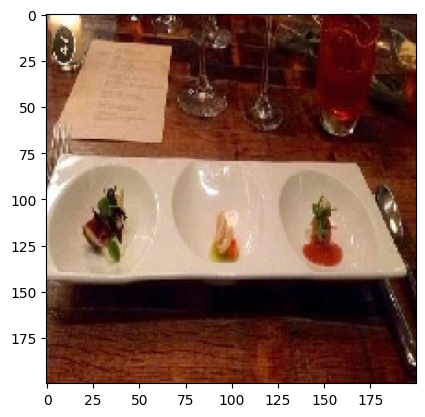

Predicted labels: ['good_for_lunch', 'outdoor_seating', 'has_alcohol', 'ambience_is_classy', 'good_for_kids']
1/1 [==============================] - 0s 19ms/step


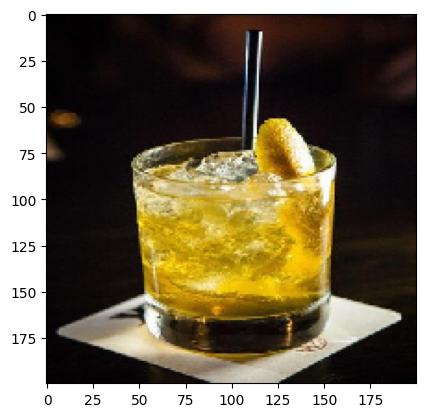

Predicted labels: ['good_for_dinner', 'has_alcohol', 'has_table_service', 'ambience_is_classy']
1/1 [==============================] - 0s 19ms/step


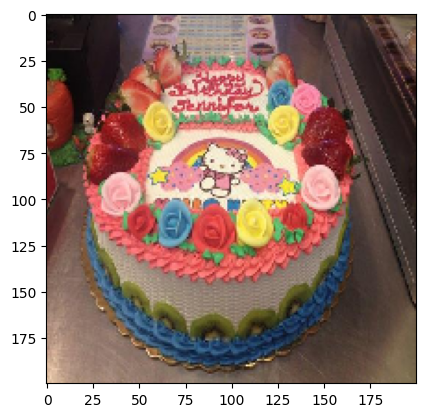

Predicted labels: ['good_for_lunch', 'outdoor_seating', 'has_alcohol', 'good_for_kids']
1/1 [==============================] - 0s 18ms/step


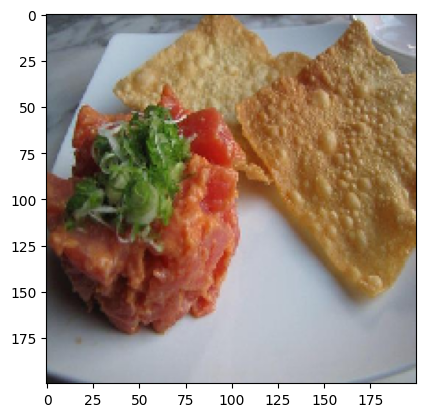

Predicted labels: ['has_alcohol', 'has_table_service', 'good_for_kids']
1/1 [==============================] - 0s 19ms/step


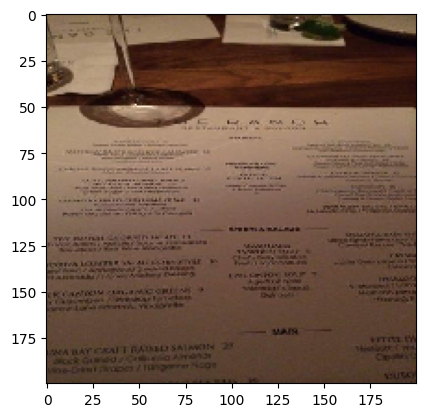

Predicted labels: ['takes_reservations', 'outdoor_seating', 'has_table_service']
1/1 [==============================] - 0s 18ms/step


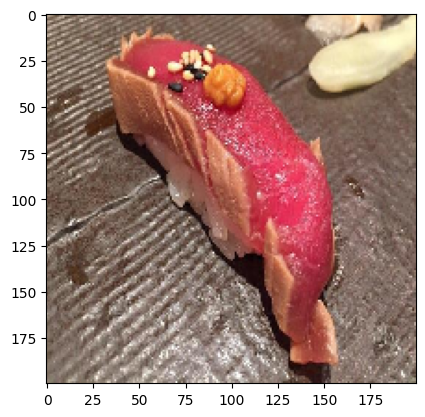

Predicted labels: ['good_for_lunch', 'restaurant_is_expensive', 'has_alcohol', 'has_table_service']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

image_directory = '/kaggle/working/test_photos'

# Assuming you have already defined img_width and img_height
image_files = [file for file in os.listdir(image_directory) if file[:-4].isdigit() and file.lower().endswith('.jpg')]

# Shuffle the list of image files
np.random.shuffle(image_files)

# Limit the number of images to predict
num_images_to_predict = 10

for i in range(num_images_to_predict):
    file = image_files[i]
    img_path = os.path.join(image_directory, file)

    # Update the target size to match the input shape of your model
    img = image.load_img(img_path, target_size=(200, 200))

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1

    # ทำนาย labels
    predictions = model.predict(img_array)

    # นำ labels ที่ทำนายได้มาเรียกตามลำดับ
    label_names = ['good_for_lunch', 'good_for_dinner', 'takes_reservations',
                   'outdoor_seating', 'restaurant_is_expensive', 'has_alcohol',
                   'has_table_service', 'ambience_is_classy', 'good_for_kids']

    predicted_labels = [label_names[i] for i, pred in enumerate(predictions[0]) if pred > 0.5]

    # แสดงรูปภาพ
    plt.imshow(img)
    plt.show()

    # แสดง labels ที่ทำนายได้
    print("Predicted labels:", predicted_labels)

# 4.Project Summary

จากการที่พวกเราทำโมเดลออกมา เราได้ค่า accuracy ประมาณ 0.1 ซึ่งเป็นค่าที่น้อยมาก แสดงให้เห็นว่า โมเดลของเรายังทำนายได้ไม่แม่นยำพอ และเราจึงทำการสร้างโมเดลเพิ่มคือ ResNet50 ผลปรากฎว่า ได้ค่า accuracy ประมาณ 0.04 ซึ่งยังได้ค่า acuuracy ที่ต่ำอยู่เช่นเดียวกัน

พวกเราได้ทดลองทำอีกโมเดล คือ Model ResNet50

จากการที่สร้างโมเดลมาทำนาย พบว่า Model CNN ทำนายได้ดีกว่า เนื่องจากได้ค่า accuracy มากกว่า ResNet50

คลิกที่นี่เพื่อดูโมเดลที่ 2 Model [ResNet50](https://www.kaggle.com/code/nnayjya/dsi206-model-resnet50)

<div style="background-color: #D9B0CD; color: white; border-radius: 20px; height:50px">
     <center><h1 style="display:block; padding:7px"> Reference </h1></center>
 </div>


ตัวอย่าง ModelCNN

Multi-Label Image Classification in Python//7 September 2020// Models CNN//สืบค้นเมื่อ 25 พ.ย 2566//จาก [https://kgptalkie.com/multi-label-image-classification-on-movies-poster-using-cnn/](http://)

สำรวจชุดข้อมูล

Data Exploration Yelp Classification// 2018 // Data Exploration //สืบค้นเมื่อ 25 พ.ย 2566//จาก [https://www.kaggle.com/code/enerrio/data-exploration-yelp-classification](http://)